In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Data Collection

### 1. Label Text Data


In [5]:
import ssl
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("IMDB Dataset.csv")

## Label Text Data Loading and Cleaning

In [14]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib,seaborn

In [15]:
print("SSL version:", ssl.OPENSSL_VERSION)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("NLTK version:", nltk.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Python version:", sys.version)

SSL version: OpenSSL 3.0.2 15 Mar 2022
Pandas version: 2.0.3
NumPy version: 1.25.2
NLTK version: 3.8.1
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [16]:
data = df.copy()
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


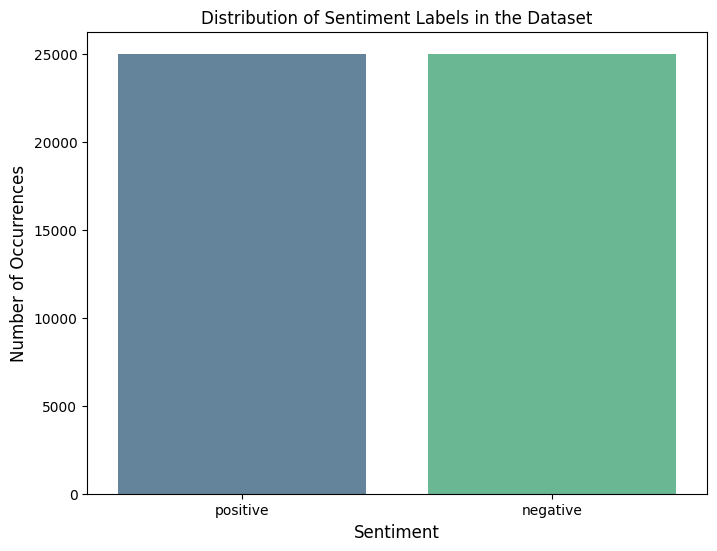

In [18]:
# Count the distribution of labels in the dataset
label_counts = data['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette="viridis")
plt.title('Distribution of Sentiment Labels in the Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()



In [21]:
dirty = BeautifulSoup(data["review"][1], 'lxml').text
dirty


'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [22]:
# Remove slash
clean = re.sub(r'[^\w\s]', '', dirty)
clean

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [23]:
# 1. Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the cleaned review
words = clean.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_sentence = ' '.join(filtered_words)

# 2. Lemmatize the words
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
lemmatized_sentence = ' '.join(lemmatized_words)

print(lemmatized_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


wonderful little production filming technique unassuming oldtimeBBC fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen Michael Sheen got polari voice pat truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwells mural decorating every surface terribly well done


In [24]:
def clean_review(review):
    # Convert to plain text
    text = BeautifulSoup(review, 'lxml').text

    # Remove punctuations
    clean_text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords and tokenize
    words = clean_text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    lemmatized_sentence = ' '.join(lemmatized_words)

    return lemmatized_sentence

data['cleaned_review'] = data['review'].apply(clean_review)


In [25]:
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One reviewer mentioned watching 1 Oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,Basically there family little boy Jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Matteis Love Time Money visually stunni...


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   cleaned_review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


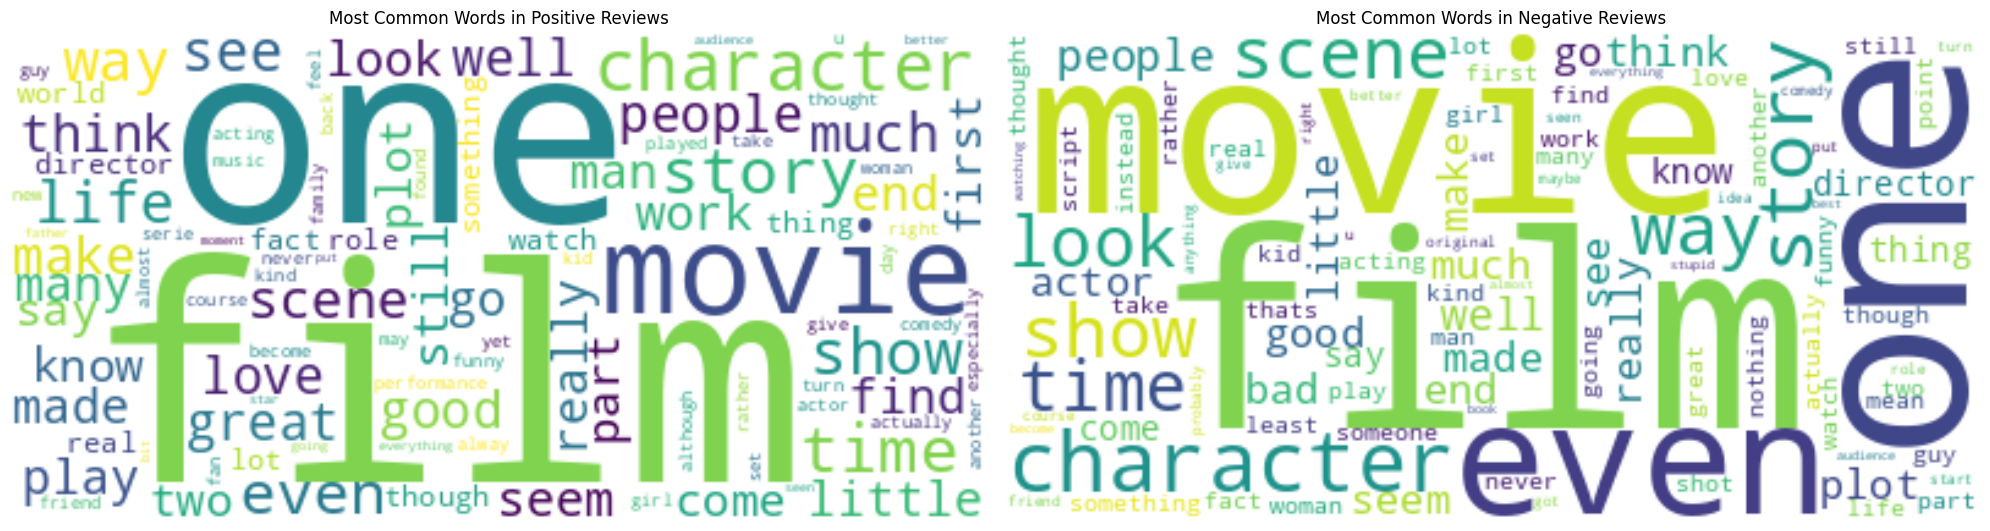

In [28]:
from wordcloud import WordCloud

# Create separate strings for positive and negative reviews
positive_reviews = ' '.join(data[data['sentiment']=='positive']['cleaned_review'])
negative_reviews = ' '.join(data[data['sentiment']=='negative']['cleaned_review'])

# Word Cloud for positive reviews
wordcloud_pos = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(positive_reviews)

# Word Cloud for negative reviews
wordcloud_neg = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(negative_reviews)

# Plotting
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Most Common Words in Positive Reviews')
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Most Common Words in Negative Reviews')
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Drop the 'review' column and rename 'cleaned_review' to 'review'
data = data.drop(columns=['review'])
data = data.rename(columns={'cleaned_review': 'review'})

# Convert sentiment values: 'negative' to 0 and 'positive' to 1
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  50000 non-null  int64 
 1   review     50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
data.head()

,sentiment,review
0,1,One reviewer mentioned watching 1 Oz episode y...
1,1,wonderful little production filming technique ...
2,1,thought wonderful way spend time hot summer we...
3,0,Basically there family little boy Jake think t...
4,1,Petter Matteis Love Time Money visually stunni...


In [ ]:
data.to_csv('cleanIMDB.csv', index=False)

## Data Preprocessing and Feature Engineering

In [ ]:
data = pd.read_csv("./drive/MyDrive/Colab Notebooks/cleanIMDB.csv")

In [32]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import scattertext as st
import collections
from IPython.display import HTML, IFrame
from textblob import TextBlob
from w3lib.html import remove_tags
from wordcloud import WordCloud
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

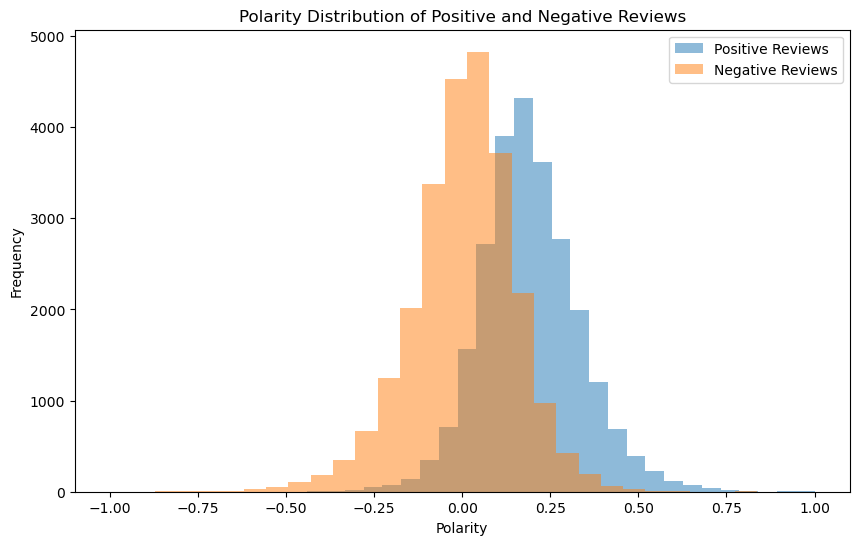

In [ ]:
# Function to calculate polarity
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to calculate polarity for each review
data['polarity'] = data['review'].apply(calculate_polarity)

# Plotting the distribution of polarity for positive and negative reviews
plt.figure(figsize=(10, 6))
plt.hist(data[data['sentiment'] == 1]['polarity'], alpha=0.5, bins=30, label='Positive Reviews')
plt.hist(data[data['sentiment'] == 0]['polarity'], alpha=0.5, bins=30, label='Negative Reviews')
plt.title('Polarity Distribution of Positive and Negative Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

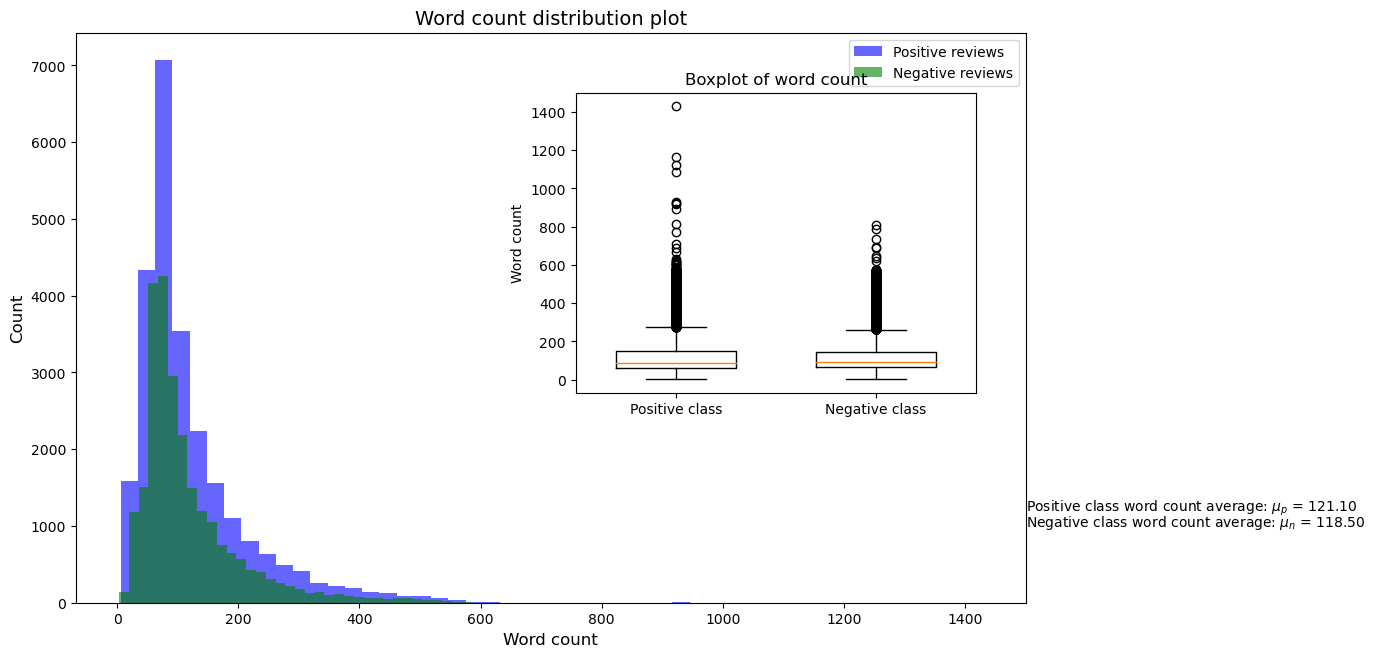

In [ ]:
# Calculate word count for each review
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

# Separate word count distributions for positive and negative reviews
pos_reviews_w_count = np.array(data.loc[data.sentiment == 1, 'word_count'])
neg_reviews_w_count = np.array(data.loc[data.sentiment == 0, 'word_count'])

# Create a new figure instance
fig = plt.figure(figsize=(10,6))

# Add axes to the figure. Create the first main window
ax1 = fig.add_axes([0, 0, 0.95, 0.95]) # window coord: (left, bottom, width, height)(in %)
ax1.hist(pos_reviews_w_count, bins=50, label='Positive reviews', alpha=0.6, color='blue')
ax1.hist(neg_reviews_w_count, bins=50, label='Negative reviews', alpha=0.6, color='green')
# Create the title, horizontal axis label, vertical axis label and legend for the histogram
ax1.set_title('Word count distribution plot', size=14)
ax1.set_xlabel('Word count', size=12)
ax1.set_ylabel('Count', size=12)
ax1.legend(loc='upper right')
# Add descriptions
ax1.text(1500, 1200, r'Positive class word count average: $\mu_p$ = {:.2f}'.format(pos_reviews_w_count.mean()))
ax1.text(1500, 1000, r'Negative class word count average: $\mu_n$ = {:.2f}'.format(neg_reviews_w_count.mean()))

# Add axes to the figure. Create the second boxplots window
ax2 = fig.add_axes([0.5, 0.35, 0.40, 0.50]) # window coord: (left, bottom, width, height)(in %)
# Create boxplots
ax2.boxplot([pos_reviews_w_count, neg_reviews_w_count], widths=0.6)
ax2.set_title('Boxplot of word count')
ax2.set_ylabel('Word count')
# Set the x axis labels
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Positive class', 'Negative class'])

plt.show()

#### Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can choose to limit the number of features
X = tfidf_vectorizer.fit_transform(data['review']).toarray()
y = data['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Models


### ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Assuming 'X_train' and 'y_train' are your features and labels respectively
input_dim = X_train.shape[1]  # Number of features

# Create model
model_ann = Sequential()
model_ann.add(Dense(256, input_dim=input_dim, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile model
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 12s 11ms/step - loss: 0.3425 - accuracy: 0.8514 - val_loss: 0.2785 - val_accuracy: 0.8840
Epoch 2/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.2244 - accuracy: 0.9111 - val_loss: 0.2917 - val_accuracy: 0.8795
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1541 - accuracy: 0.9439 - val_loss: 0.3382 - val_accuracy: 0.8810
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0819 - accuracy: 0.9728 - val_loss: 0.4322 - val_accuracy: 0.8755
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.4876 - val_accuracy: 0.8735
Epoch 6/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.5845 - val_accuracy: 0.8714
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.5484 -

In [ ]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1313281 (5.01 MB)
Trainable params: 1313281 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Predictions for the training set
y_train_pred = model_ann.predict(X_train)
y_train_pred = (y_train_pred > 0.5)  # Converting probabilities to binary

# Predictions for the testing set
y_test_pred = model_ann.predict(X_test)
y_test_pred = (y_test_pred > 0.5)


313/313 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_performance(y_true, y_pred, set_name="Set"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {set_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")



In [ ]:
# For training set
evaluate_performance(y_train, y_train_pred, set_name="Training")

Metrics for Training:
Accuracy: 0.9741
Precision: 0.9751
Recall: 0.9729
F1 Score: 0.9740



In [ ]:
# For testing set
evaluate_performance(y_test, y_test_pred, set_name="Testing")

Metrics for Testing:
Accuracy: 0.8717
Precision: 0.8726
Recall: 0.8728
F1 Score: 0.8727



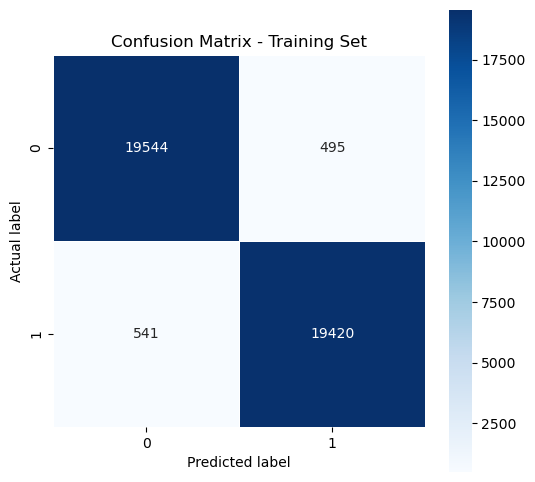

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)

# Plot for training set
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix - Training Set')


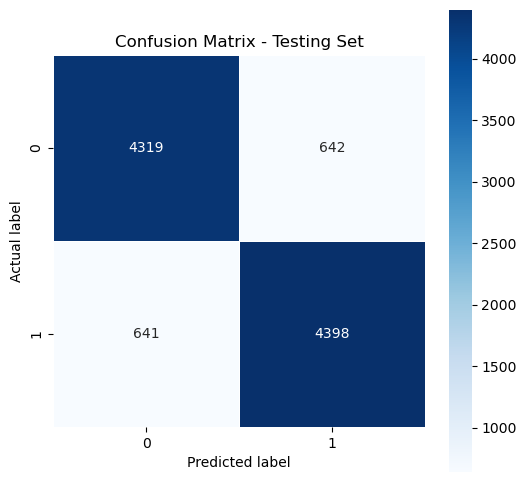

In [ ]:
# Plot for testing set
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix - Testing Set')

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_scores, set_name="Set"):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {set_name}')
    plt.legend(loc="lower right")
    plt.show()



1250/1250 [==============================] - 2s 1ms/step


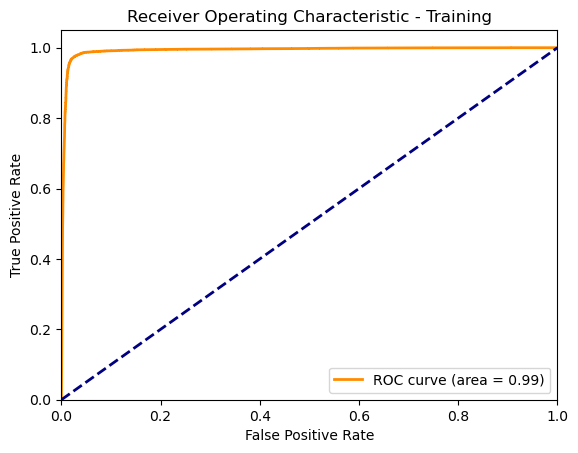

In [ ]:
# For training set
y_train_scores = model_ann.predict(X_train)  # Use predict instead of predict_proba
plot_roc_curve(y_train, y_train_scores, set_name="Training")


313/313 [==============================] - 1s 2ms/step


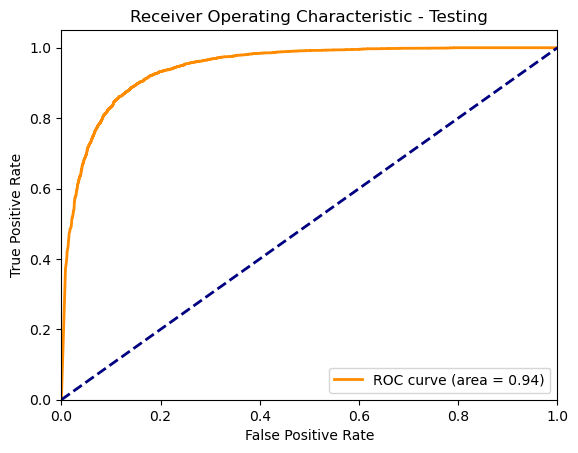

In [ ]:
# For testing set
y_test_scores = model_ann.predict(X_test)  # Use predict instead of predict_proba
plot_roc_curve(y_test, y_test_scores, set_name="Testing")

In [ ]:
model_ann.save('ANN_IMDB.h5')

### LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer

# Assuming 'data.review' contains your text data
tokenizer = Tokenizer(num_words=5000)  # This will keep only the 5000 most frequent words
tokenizer.fit_on_texts(data['review'])

X = tokenizer.texts_to_sequences(data['review'])


In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_review_length = 500  # Define the maximum length of the reviews
X_padded = pad_sequences(X, maxlen=max_review_length)


In [ ]:
from sklearn.model_selection import train_test_split

y = data['sentiment']  # Assuming 'sentiment' column contains your labels
X_train_padded, X_test_padded, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout

# Assuming the maximum length of your reviews is 'max_review_length'
max_review_length = 500  # Set this based on your data

model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(5000, 32, input_length=max_review_length))  # Vocabulary size: 5000, Embedding dimension: 32

# First LSTM layer with dropout
model_deep_lstm.add(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
# Second LSTM layer with dropout
model_deep_lstm.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))

# Optionally, you can add more LSTM or Dense layers here
# model_deep_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

model_deep_lstm.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile model
model_deep_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming 'X_train_padded' is your padded sequence data
model_deep_lstm.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 [==============================] - 2694s 3s/step - loss: 0.3735 - accuracy: 0.8332 - val_loss: 0.3043 - val_accuracy: 0.8748
Epoch 2/10
1000/1000 [==============================] - 2602s 3s/step - loss: 0.2715 - accuracy: 0.8940 - val_loss: 0.3039 - val_accuracy: 0.8745
Epoch 3/10
1000/1000 [==============================] - 2578s 3s/step - loss: 0.2252 - accuracy: 0.9132 - val_loss: 0.3054 - val_accuracy: 0.8748
Epoch 4/10
1000/1000 [==============================] - 2595s 3s/step - loss: 0.1917 - accuracy: 0.9273 - val_loss: 0.3347 - val_accuracy: 0.8739
Epoch 5/10
1000/1000 [==============================] - 2636s 3s/step - loss: 0.1686 - accuracy: 0.9377 - val_loss: 0.3517 - val_accuracy: 0.8736
Epoch 6/10
1000/1000 [==============================] - 2631s 3s/step - loss: 0.1512 - accuracy: 0.9440 - val_loss: 0.3513 - val_accuracy: 0.8674
Epoch 7/10
1000/1000 [==============================] - 2576s 3s/step - loss: 0.2116 - accuracy: 0.9152 - val_loss: 0.3679 -

In [ ]:
model_deep_lstm.save('LSTM_IMDB.keras')

### Transformer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, MultiHeadAttention, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras import layers

In [ ]:
def positional_encoding(max_len, d_model):
    pos_enc = np.zeros((max_len, d_model))
    for pos in range(max_len):
        for i in range(0, d_model, 2):
            pos_enc[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            pos_enc[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))
    return pos_enc


In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network
max_review_length = 500
inputs = layers.Input(shape=(max_review_length,))
x = Embedding(input_dim=5000, output_dim=embed_dim)(inputs)
x *= tf.math.sqrt(tf.cast(embed_dim, tf.float32))
x += positional_encoding(max_review_length, embed_dim)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)

model_transformer = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_transformer.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model_transformer.fit(X_train_padded, y_train, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20
1125/1125 [==============================] - 114s 93ms/step - loss: 0.3819 - accuracy: 0.8121 - val_loss: 0.2716 - val_accuracy: 0.8928
Epoch 2/20
1125/1125 [==============================] - 34s 30ms/step - loss: 0.2485 - accuracy: 0.9022 - val_loss: 0.2710 - val_accuracy: 0.8873
Epoch 3/20
1125/1125 [==============================] - 26s 23ms/step - loss: 0.2277 - accuracy: 0.9112 - val_loss: 0.2803 - val_accuracy: 0.8875
Epoch 4/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.2147 - accuracy: 0.9156 - val_loss: 0.2853 - val_accuracy: 0.8905
Epoch 5/20
1125/1125 [==============================] - 22s 20ms/step - loss: 0.2000 - accuracy: 0.9202 - val_loss: 0.3216 - val_accuracy: 0.8800
Epoch 6/20
1125/1125 [==============================] - 19s 17ms/step - loss: 0.1859 - accuracy: 0.9240 - val_loss: 0.3279 - val_accuracy: 0.8815
Epoch 7/20
1125/1125 [==============================] - 19s 17ms/step - loss: 0.1699 - accuracy: 0.9285 - val_loss: 0.3448 

In [ ]:
model_transformer.save('./drive/MyDrive/Colab Notebooks/Transformer.keras')

In [ ]:
import numpy as np

# Predict the labels of the test data
y_pred = model_transformer.predict(X_test_padded)
y_pred_classes = np.round(y_pred).astype(int)  # Convert probabilities to class labels for binary classification


313/313 [==============================] - 3s 8ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)


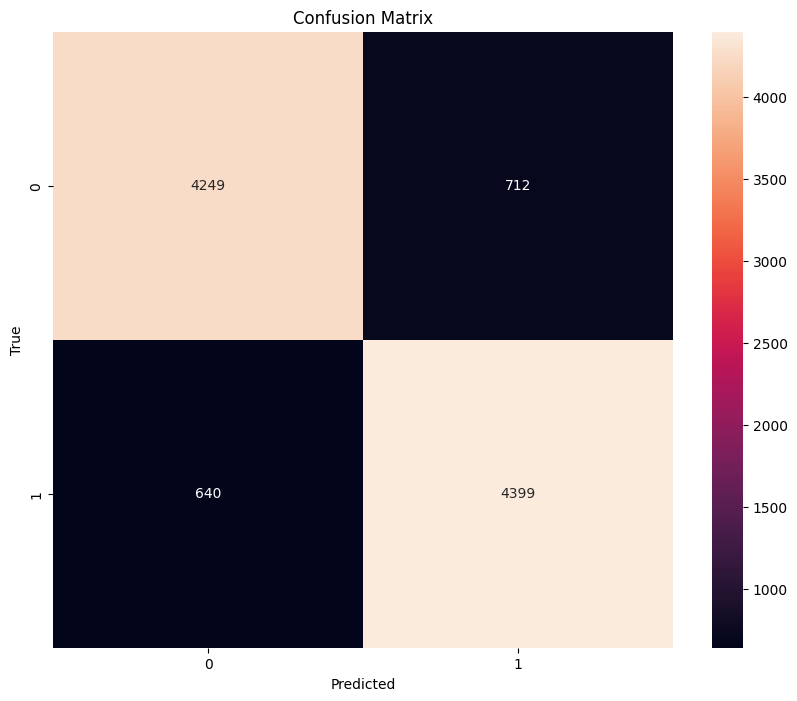

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
